In [1]:
import scipy.io as sio
import numpy as np

mat = sio.loadmat("/Users/saptarshimallikthakur/Pictures/VLM/locllm_nanovlm/mpii_human_pose_v1_u12_2/mpii_human_pose_v1_u12_1.mat", struct_as_record=False, squeeze_me=True)
annolist = mat["RELEASE"].annolist

for anno in annolist[:10]:
    img_name = anno.image.name
    print(img_name)

    if not hasattr(anno, "annorect"):
        continue

    rects = anno.annorect
    if not isinstance(rects, (list, np.ndarray)):
        rects = [rects]

    for ridx, rect in enumerate(rects):
        if not hasattr(rect, "annopoints"):
            continue

        annopoints = rect.annopoints

        # ✅ annopoints itself can be a numpy array or single struct
        if isinstance(annopoints, np.ndarray):
            annopoints = annopoints.tolist()
        elif not isinstance(annopoints, list):
            annopoints = [annopoints]

        for ap in annopoints:
            if not hasattr(ap, "point"):
                continue

            points = ap.point
            if isinstance(points, np.ndarray):
                points = points.tolist()
            elif not isinstance(points, list):
                points = [points]

            for p in points:
                if not hasattr(p, "id"):
                    continue

                pid = int(p.id)
                x = float(p.x)
                y = float(p.y)

                # Handle visibility robustly
                vis = -1
                if hasattr(p, "is_visible"):
                    v = p.is_visible
                    if isinstance(v, np.ndarray) and v.size > 0:
                        vis = int(v.flatten()[0])
                    elif isinstance(v, (int, float)):
                        vis = int(v)

                print(f"  Person {ridx}, Joint {pid}: ({x}, {y}), visible={vis}")


037454012.jpg
095071431.jpg
073199394.jpg
059865848.jpg
015601864.jpg
  Person 0, Joint 6: (610.0, 187.0), visible=0
  Person 0, Joint 7: (647.0, 176.0), visible=1
  Person 0, Joint 8: (637.0201, 189.8183), visible=-1
  Person 0, Joint 9: (695.9799, 108.1817), visible=-1
  Person 0, Joint 0: (620.0, 394.0), visible=1
  Person 0, Joint 1: (616.0, 269.0), visible=1
  Person 0, Joint 2: (573.0, 185.0), visible=1
  Person 0, Joint 3: (647.0, 188.0), visible=0
  Person 0, Joint 4: (661.0, 221.0), visible=1
  Person 0, Joint 5: (656.0, 231.0), visible=1
  Person 0, Joint 10: (606.0, 217.0), visible=1
  Person 0, Joint 11: (553.0, 161.0), visible=1
  Person 0, Joint 12: (601.0, 167.0), visible=1
  Person 0, Joint 13: (692.0, 185.0), visible=1
  Person 0, Joint 14: (693.0, 240.0), visible=1
  Person 0, Joint 15: (688.0, 313.0), visible=1
  Person 1, Joint 6: (979.0, 221.0), visible=0
  Person 1, Joint 7: (906.0, 190.0), visible=0
  Person 1, Joint 8: (912.4915, 190.6586), visible=-1
  Person 1

In [8]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import os

# --- PATHS ---
mat_path = "/Users/saptarshimallikthakur/Pictures/VLM/locllm_nanovlm/mpii_human_pose_v1_u12_2/mpii_human_pose_v1_u12_1.mat"
img_root = "/Users/saptarshimallikthakur/Pictures/mpii_data/images"

# --- Load annotations ---
mat = sio.loadmat(mat_path, struct_as_record=False, squeeze_me=True)
annolist = mat["RELEASE"].annolist

Showing keypoints for: /Users/saptarshimallikthakur/Pictures/mpii_data/images/002058449.jpg


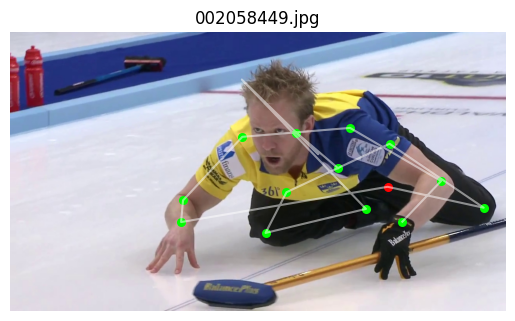

In [11]:
# --- Pick one image (you can change this index) ---
idx = 10
anno = annolist[idx]
img_name = anno.image.name
img_path = os.path.join(img_root, img_name)
print(f"Showing keypoints for: {img_path}")

# --- Load image ---
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis("off")

# --- Extract and plot keypoints ---
if hasattr(anno, "annorect"):
    rects = anno.annorect
    if not isinstance(rects, (list, np.ndarray)):
        rects = [rects]

    for ridx, rect in enumerate(rects):
        if not hasattr(rect, "annopoints"):
            continue

        annopoints = rect.annopoints
        if isinstance(annopoints, np.ndarray):
            annopoints = annopoints.tolist()
        elif not isinstance(annopoints, list):
            annopoints = [annopoints]

        for ap in annopoints:
            if not hasattr(ap, "point"):
                continue

            points = ap.point
            if isinstance(points, np.ndarray):
                points = points.tolist()
            elif not isinstance(points, list):
                points = [points]

            xs, ys, vis = [], [], []
            for p in points:
                if not hasattr(p, "id"):
                    continue
                x, y = float(p.x), float(p.y)
                v = -1
                if hasattr(p, "is_visible"):
                    vv = p.is_visible
                    if isinstance(vv, np.ndarray) and vv.size > 0:
                        v = int(vv.flatten()[0])
                    elif isinstance(vv, (int, float)):
                        v = int(vv)
                xs.append(x)
                ys.append(y)
                vis.append(v)

            xs = np.array(xs)
            ys = np.array(ys)
            vis = np.array(vis)

            # --- Plot visible vs invisible keypoints ---
            plt.scatter(xs[vis == 1], ys[vis == 1], c='lime', label='visible', s=30)
            plt.scatter(xs[vis == 0], ys[vis == 0], c='red', label='occluded', s=30)
            plt.plot(xs, ys, 'w-', alpha=0.5)  # optional: connect joints

plt.title(img_name)
plt.show()

In [22]:
import os
import numpy as np
import pandas as pd
import scipy.io as sio

# --- MPII MAT file and image directory ---
mat_path = "/Users/saptarshimallikthakur/Pictures/VLM/locllm_nanovlm/mpii_human_pose_v1_u12_2/mpii_human_pose_v1_u12_1.mat"
img_root = "/Users/saptarshimallikthakur/Pictures/mpii_data/images"

# --- Load the MAT file ---
mat = sio.loadmat(mat_path, struct_as_record=False, squeeze_me=True)
annolist = mat["RELEASE"].annolist

# --- Define MPII keypoint names (id order) ---
joint_names = [
    "right_ankle", "right_knee", "right_hip", "left_hip", "left_knee", "left_ankle",
    "pelvis", "thorax", "upper_neck", "head_top",
    "right_wrist", "right_elbow", "right_shoulder", "left_shoulder", "left_elbow", "left_wrist"
]

records = []  # will store rows as dicts

for anno in annolist:
    if not hasattr(anno, "image"):
        continue
    img_name = anno.image.name
    img_path = os.path.join(img_root, img_name)

    if not hasattr(anno, "annorect"):
        continue

    rects = anno.annorect
    if not isinstance(rects, (list, np.ndarray)):
        rects = [rects]

    # dictionary: keypoint_id -> list of [x,y]
    kp_dict = {}

    for rect in rects:
        if not hasattr(rect, "annopoints"):
            continue

        annopoints = rect.annopoints
        if isinstance(annopoints, np.ndarray):
            annopoints = annopoints.tolist()
        elif not isinstance(annopoints, list):
            annopoints = [annopoints]

        for ap in annopoints:
            if not hasattr(ap, "point"):
                continue
            points = ap.point
            if isinstance(points, np.ndarray):
                points = points.tolist()
            elif not isinstance(points, list):
                points = [points]

            for p in points:
                if not hasattr(p, "id"):
                    continue
                pid = int(p.id)
                x, y = float(p.x), float(p.y)
                kp_dict.setdefault(pid, []).append([x, y])

    # for each keypoint id found, create a row
    for pid, coords in kp_dict.items():
        keypoint_name = joint_names[pid] if pid < len(joint_names) else f"joint_{pid}"
        records.append({
            "img_path": img_path,
            "keypoint": keypoint_name,
            "coordinates": coords
        })

# --- Create DataFrame ---
df = pd.DataFrame(records)
df.head(20)

,img_path,keypoint,coordinates
0,/Users/saptarshimallikthakur/Pictures/mpii_dat...,pelvis,"[[610.0, 187.0], [979.0, 221.0]]"
1,/Users/saptarshimallikthakur/Pictures/mpii_dat...,thorax,"[[647.0, 176.0], [906.0, 190.0]]"
2,/Users/saptarshimallikthakur/Pictures/mpii_dat...,upper_neck,"[[637.0201, 189.8183], [912.4915, 190.6586]]"
3,/Users/saptarshimallikthakur/Pictures/mpii_dat...,head_top,"[[695.9799, 108.1817], [830.5085, 182.3414]]"
4,/Users/saptarshimallikthakur/Pictures/mpii_dat...,right_ankle,"[[620.0, 394.0], [895.0, 293.0]]"
5,/Users/saptarshimallikthakur/Pictures/mpii_dat...,right_knee,"[[616.0, 269.0], [910.0, 279.0]]"
6,/Users/saptarshimallikthakur/Pictures/mpii_dat...,right_hip,"[[573.0, 185.0], [945.0, 223.0]]"
7,/Users/saptarshimallikthakur/Pictures/mpii_dat...,left_hip,"[[647.0, 188.0], [1012.0, 218.0]]"
8,/Users/saptarshimallikthakur/Pictures/mpii_dat...,left_knee,"[[661.0, 221.0], [961.0, 315.0]]"
9,/Users/saptarshimallikthakur/Pictures/mpii_dat...,left_ankle,"[[656.0, 231.0], [960.0, 403.0]]"
